In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Read the data

In [2]:
data = pd.read_csv('../DATA/H1b_EDA_data.csv',encoding = 'ISO-8859-1')
print(data.shape)
data.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2448729, 36)


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_CITY,EMP_STATE_abb,...,WORKSITE_POSTAL_CODE,YEAR,NAIC_CODE,WAGE_RATE_OF_PAY,total_wage,Sector_data,EMP_STATE_full,EMP_State_and_city,Worksite_STATE_full,Worksite_State_and_city
0,I-200-09121-701936,WITHDRAWN,2/5/2015,2/5/2015,H-1B,02/09/2015,02/28/2015,"MEDTRONIC, INC.",MINNEAPOLIS,MN,...,55412,2015,3345.0,20000 -,19000.0,33.0,Minnesota,"MINNEAPOLIS, Minnesota",California,"EDEN PRAIRIE, California"
1,I-200-09146-796321,CERTIFIED,12/12/2014,12/18/2014,H-1B,01/05/2015,01/04/2018,UNIVERSITY OF OKLAHOMA,NORMAN,OK,...,73019,2015,6113.0,85000.00 -,42860.0,61.0,Oklahoma,"NORMAN, Oklahoma",Oklahoma,"NORMAN, Oklahoma"
2,I-200-09180-329758,WITHDRAWN,1/3/2013,12/15/2014,H-1B,01/07/2013,01/06/2016,NOKIA INC.,IRVING,TX,...,92127,2015,5172.0,94000 -,73965.0,51.0,Texas,"IRVING, Texas",California,"SAN DIEGO, California"
3,I-200-09183-259985,CERTIFIED,3/10/2015,3/16/2015,H-1B,09/07/2015,09/07/2018,"OMRON OILFIELD AND MARINE, INC.",HOUSTON,TX,...,77088,2015,3353.0,66000 - 70000,65998.0,33.0,Texas,"HOUSTON, Texas",Texas,"HOUSTON, Texas"
4,I-200-09189-800933,CERTIFIED,12/17/2014,12/23/2014,H-1B,06/06/2015,06/05/2018,FEDERAL HOME LOAN MORTGAGE CO.,MCLEAN,VA,...,22102,2015,5222.0,97000 - 143300,96907.0,52.0,Virginia,"MCLEAN, Virginia",Virginia,"MCLEAN, Virginia"


## Find the number of NA for each feature

In [3]:
def count_na(column):
    return column.isna().sum()
data.apply(count_na)

CASE_NUMBER                     0
CASE_STATUS                     0
CASE_SUBMITTED                  1
DECISION_DATE                   0
VISA_CLASS                      0
EMPLOYMENT_START_DATE          38
EMPLOYMENT_END_DATE            47
EMPLOYER_NAME                  67
EMPLOYER_CITY                  29
EMP_STATE_abb                   0
EMPLOYER_POSTAL_CODE           57
EMPLOYER_COUNTRY                0
EMPLOYER_PHONE                  1
AGENT_ATTORNEY_NAME        227034
AGENT_ATTORNEY_CITY        840452
AGENT_ATTORNEY_STATE       899957
JOB_TITLE                      11
SOC_CODE                       18
SOC_NAME                       20
FULL_TIME_POSITION              7
PREVAILING_WAGE                 0
PW_UNIT_OF_PAY                  0
WAGE_UNIT_OF_PAY               19
WORKSITE_CITY                  41
WORKSITE_COUNTY              4616
Worksite_STATE_abb             16
WORKSITE_POSTAL_CODE           70
YEAR                            0
NAIC_CODE                       2
WAGE_RATE_OF_P

## Preprocessing

1. Delete the unused features. 
2. Calculate the duration of datetime. 
3. Delete the rows with NA. 
4. Do specific preprocessing listed in the following table. 


|Name|NACount|Note|
| :---- | :---- | :---- |
|Sector_data|2|<font color = 'red'>Delete </font>|
|EMP_STATE_full|2358|<font color = 'red'>Delete </font>|
|EMP_State_and_city|0|<font color = 'red'>Delete </font>|
|Worksite_STATE_full|2453|<font color = 'red'>Delete </font>|
|Worksite_State_and_city|0|<font color = 'red'>Delete </font>|
|EMPLOYER_PHONE|1|<font color = 'red'>Delete </font>|
|AGENT_ATTORNEY_NAME|227034|<font color = 'red'>Delete </font>|
|AGENT_ATTORNEY_CITY|840452|<font color = 'red'>Delete </font>|
|AGENT_ATTORNEY_STATE|899957|<font color = 'red'>Delete </font>|
|JOB_TITLE|11|<font color = 'red'>Delete </font>|
|EMPLOYER_POSTAL_CODE|57|<font color = 'red'>Delete </font>|
|WORKSITE_POSTAL_CODE|70|<font color = 'red'>Delete </font>|
|YEAR|0|<font color = 'red'>Delete </font>|
|WORKSITE_COUNTY|4616|<font color = 'red'>Delete </font>|
|WAGE_RATE_OF_PAY|0|<font color = 'red'>Delete </font>|
|CASE_STATUS|0|<font color = 'green'>label </font>|
|CASE_SUBMITTED|1| <font color = 'blue'> calculate duration </font>|
|DECISION_DATE|0|<font color = 'blue'> calculate duration </font>|
|EMPLOYMENT_START_DATE|38|<font color = 'blue'> calculate duration </font>|
|EMPLOYMENT_END_DATE|47|<font color = 'blue'> calculate duration </font>|
|EMPLOYER_COUNTRY|0|<font color = 'blue'> Only consider American. </font>|
|PREVAILING_WAGE|0|<font color = 'blue'> Normalize it to yearly wage. </font>|
|PW_UNIT_OF_PAY|0|<font color = 'blue'> Normalize it to yearly wage. </font>|
|WAGE_UNIT_OF_PAY|19|<font color = 'blue'> Normalize it to yearly wage. </font>|
|total_wage|0|<font color = 'blue'> Normalize it to yearly wage. </font>|
|NAIC_CODE|2|<font color = 'blue'> Keep three digits. </font>|
|EMPLOYER_CITY|29|<font color = 'blue'> For geographical figures.  </font>|
|EMP_STATE_abb|0|<font color = 'blue'> For geographical figures. </font>|
|CASE_NUMBER|0||
|VISA_CLASS|0||
|EMPLOYER_NAME|67||
|SOC_CODE|18||
|SOC_NAME|20||
|FULL_TIME_POSITION|7||
|WORKSITE_CITY|41||
|Worksite_STATE_abb|16||


Pick up the features to be analyzed on in the first place. 

In [4]:
label = ['CASE_STATUS']
target = data.loc[:, label]

features = ['CASE_SUBMITTED', 'DECISION_DATE', 'EMPLOYMENT_START_DATE', 
            'EMPLOYMENT_END_DATE', 'EMPLOYER_COUNTRY', 'PREVAILING_WAGE', 
           'PW_UNIT_OF_PAY', 'WAGE_UNIT_OF_PAY', 'NAIC_CODE',
           'EMPLOYER_CITY', 'EMP_STATE_abb', 'CASE_NUMBER', 'VISA_CLASS',
           'EMPLOYER_NAME', 'SOC_CODE', 'SOC_NAME', 'FULL_TIME_POSITION',
           'WORKSITE_CITY', 'Worksite_STATE_abb', 'total_wage','CASE_STATUS']
train_vals = data.loc[:, features]

### drop NA rows

In [5]:
# Drop NA
train_vals = train_vals.dropna()
# Keep rows with employer country = usa
train_vals = train_vals[train_vals['EMPLOYER_COUNTRY'] == 'UNITED STATES OF AMERICA']

In [6]:
count_labels = ['SOC_CODE', 'NAIC_CODE', 'EMPLOYER_NAME']
for c in count_labels:
    print('%s\t\t%d'%(c, len(np.unique(train_vals[c]))))
np.unique(data['NAIC_CODE'])


SOC_CODE		1238
NAIC_CODE		531
EMPLOYER_NAME		169790


array([   0.,   23.,   31.,  111.,  161.,  211.,  236.,  237.,  315.,
        334.,  517.,  523.,  541.,  622., 1068., 1108., 1111., 1112.,
       1113., 1114., 1119., 1120., 1121., 1122., 1123., 1124., 1125.,
       1129., 1131., 1132., 1133., 1141., 1142., 1151., 1152., 1153.,
       1171., 1191., 1234., 1311., 1320., 1324., 1325., 1435., 1510.,
       1511., 1515., 1517., 1522., 1531., 1542., 1582., 1934., 1937.,
       1980., 2006., 2009., 2110., 2111., 2112., 2121., 2122., 2123.,
       2131., 2210., 2211., 2212., 2213., 2272., 2300., 2321., 2331.,
       2332., 2333., 2349., 2355., 2361., 2362., 2371., 2372., 2373.,
       2379., 2381., 2382., 2383., 2389., 2415., 2512., 2731., 2910.,
       2911., 3034., 3100., 3110., 3111., 3112., 3113., 3114., 3115.,
       3116., 3117., 3118., 3119., 3120., 3121., 3122., 3131., 3132.,
       3133., 3141., 3149., 3150., 3151., 3152., 3159., 3161., 3162.,
       3169., 3211., 3212., 3213., 3219., 3220., 3221., 3222., 3225.,
       3231., 3233.,

### Deal with NAIC CODE
NAICS is the standard used to classifying business establishments. In other words, it is used to classify the company into different industrial field.

In [7]:
def naic_process(code):
    if(code > 100000):
        res = code // 1000
    elif(code > 10000):
        res = code // 100
    elif(code > 1000):
        res = code // 10
    else:
        res = code
    
    return str(int(res))

# Drop rows with NAIC_CODE less than 3 digits
train_vals = train_vals[train_vals['NAIC_CODE'] > 100]
# Keep the first 3 digits of the remaining NAIC_CODE
train_vals.loc[:, 'NAIC_CODE'] = train_vals.loc[:, 'NAIC_CODE'].apply(lambda x: naic_process(x))

In [8]:
count_labels = ['SOC_CODE', 'NAIC_CODE', 'EMPLOYER_NAME']
for c in count_labels:
    print('%s\t\t%d' % (c, len(np.unique(train_vals[c]))))
np.unique(train_vals['NAIC_CODE'])


SOC_CODE		1238
NAIC_CODE		192
EMPLOYER_NAME		169790


array(['106', '110', '111', '112', '113', '114', '115', '117', '119',
       '123', '131', '132', '143', '151', '152', '153', '154', '158',
       '161', '193', '198', '200', '211', '212', '213', '221', '227',
       '230', '232', '233', '234', '235', '236', '237', '238', '241',
       '251', '273', '291', '303', '310', '311', '312', '313', '314',
       '315', '316', '321', '322', '323', '324', '325', '326', '327',
       '329', '331', '332', '333', '334', '335', '336', '337', '339',
       '345', '352', '353', '357', '367', '382', '421', '422', '423',
       '424', '425', '429', '435', '441', '442', '443', '444', '445',
       '446', '447', '448', '451', '452', '453', '454', '466', '472',
       '481', '482', '483', '484', '485', '486', '487', '488', '491',
       '492', '493', '504', '511', '512', '513', '514', '515', '516',
       '517', '518', '519', '521', '522', '523', '524', '525', '531',
       '532', '533', '535', '538', '541', '542', '543', '544', '545',
       '546', '547',

In [9]:
import time 
import datetime
def str_to_datetime(string):
    try:
        timestamp = time.strptime(string, '%m/%d/%Y')
        return datetime.datetime(*timestamp[:6])
    except:
        try:
            timestamp = time.strptime(string, '%d/%m/%Y')
            return datetime.datetime(*timestamp[:6])
        except:
            return 

In [10]:
date_label = ['CASE_SUBMITTED', 
              'DECISION_DATE', 
              'EMPLOYMENT_START_DATE', 
              'EMPLOYMENT_END_DATE']
data_date = train_vals.loc[:,date_label]

In [11]:
data_date = data_date.applymap(str_to_datetime)

In [12]:
data_date.head()

,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE
0,2015-02-05,2015-02-05,2015-02-09,2015-02-28
1,2014-12-12,2014-12-18,2015-01-05,2018-01-04
2,2013-01-03,2014-12-15,2013-01-07,2016-01-06
3,2015-03-10,2015-03-16,2015-09-07,2018-09-07
4,2014-12-17,2014-12-23,2015-06-06,2018-06-05


In [13]:
train_vals = train_vals.drop(columns = date_label)
train_vals = pd.concat([train_vals, data_date], axis=1)
train_vals.head()


,EMPLOYER_COUNTRY,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_UNIT_OF_PAY,NAIC_CODE,EMPLOYER_CITY,EMP_STATE_abb,CASE_NUMBER,VISA_CLASS,EMPLOYER_NAME,...,SOC_NAME,FULL_TIME_POSITION,WORKSITE_CITY,Worksite_STATE_abb,total_wage,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE
0,UNITED STATES OF AMERICA,19000.0,Year,Year,334,MINNEAPOLIS,MN,I-200-09121-701936,H-1B,"MEDTRONIC, INC.",...,MECHANICAL ENGINEERS,Y,EDEN PRAIRIE,CA,19000.0,WITHDRAWN,2015-02-05,2015-02-05,2015-02-09,2015-02-28
1,UNITED STATES OF AMERICA,42860.0,Year,Year,611,NORMAN,OK,I-200-09146-796321,H-1B,UNIVERSITY OF OKLAHOMA,...,"ENGINEERING TEACHERS, POSTSECONDARY",Y,NORMAN,OK,42860.0,CERTIFIED,2014-12-12,2014-12-18,2015-01-05,2018-01-04
2,UNITED STATES OF AMERICA,73965.0,Year,Year,517,IRVING,TX,I-200-09180-329758,H-1B,NOKIA INC.,...,"COMPUTER OCCUPATIONS, ALL OTHER*",Y,SAN DIEGO,CA,73965.0,WITHDRAWN,2013-01-03,2014-12-15,2013-01-07,2016-01-06
3,UNITED STATES OF AMERICA,65998.0,Year,Year,335,HOUSTON,TX,I-200-09183-259985,H-1B,"OMRON OILFIELD AND MARINE, INC.",...,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",Y,HOUSTON,TX,65998.0,CERTIFIED,2015-03-10,2015-03-16,2015-09-07,2018-09-07
4,UNITED STATES OF AMERICA,96907.0,Year,Year,522,MCLEAN,VA,I-200-09189-800933,H-1B,FEDERAL HOME LOAN MORTGAGE CO.,...,COMPUTER PROGRAMMERS,Y,MCLEAN,VA,96907.0,CERTIFIED,2014-12-17,2014-12-23,2015-06-06,2018-06-05


In [14]:
train_vals['CASE_DURATION'] = train_vals.loc[:,'DECISION_DATE'] - train_vals.loc[:,'CASE_SUBMITTED']
train_vals['EMPLOYMENT_DURATION'] = train_vals.loc[:,'EMPLOYMENT_END_DATE'] - train_vals.loc[:, 'EMPLOYMENT_START_DATE']

In [15]:
def to_days(e):
    try:
        return int(e.days)
    except:
        try:
            return int(e)
        except:
            return 

In [16]:
train_vals.loc[:,'CASE_DURATION'] = train_vals.loc[:,'CASE_DURATION'].apply(to_days) 
train_vals.loc[:, 'EMPLOYMENT_DURATION'] = train_vals.loc[:,'EMPLOYMENT_DURATION'].apply(to_days)
train_vals.head()


,EMPLOYER_COUNTRY,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_UNIT_OF_PAY,NAIC_CODE,EMPLOYER_CITY,EMP_STATE_abb,CASE_NUMBER,VISA_CLASS,EMPLOYER_NAME,...,WORKSITE_CITY,Worksite_STATE_abb,total_wage,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,CASE_DURATION,EMPLOYMENT_DURATION
0,UNITED STATES OF AMERICA,19000.0,Year,Year,334,MINNEAPOLIS,MN,I-200-09121-701936,H-1B,"MEDTRONIC, INC.",...,EDEN PRAIRIE,CA,19000.0,WITHDRAWN,2015-02-05,2015-02-05,2015-02-09,2015-02-28,0,19.0
1,UNITED STATES OF AMERICA,42860.0,Year,Year,611,NORMAN,OK,I-200-09146-796321,H-1B,UNIVERSITY OF OKLAHOMA,...,NORMAN,OK,42860.0,CERTIFIED,2014-12-12,2014-12-18,2015-01-05,2018-01-04,6,1095.0
2,UNITED STATES OF AMERICA,73965.0,Year,Year,517,IRVING,TX,I-200-09180-329758,H-1B,NOKIA INC.,...,SAN DIEGO,CA,73965.0,WITHDRAWN,2013-01-03,2014-12-15,2013-01-07,2016-01-06,711,1094.0
3,UNITED STATES OF AMERICA,65998.0,Year,Year,335,HOUSTON,TX,I-200-09183-259985,H-1B,"OMRON OILFIELD AND MARINE, INC.",...,HOUSTON,TX,65998.0,CERTIFIED,2015-03-10,2015-03-16,2015-09-07,2018-09-07,6,1096.0
4,UNITED STATES OF AMERICA,96907.0,Year,Year,522,MCLEAN,VA,I-200-09189-800933,H-1B,FEDERAL HOME LOAN MORTGAGE CO.,...,MCLEAN,VA,96907.0,CERTIFIED,2014-12-17,2014-12-23,2015-06-06,2018-06-05,6,1095.0


In [17]:
train_vals = train_vals.dropna()
train_vals = train_vals.drop(columns='EMPLOYER_COUNTRY')
train_vals = train_vals.drop(columns=date_label)
train_vals.head()


,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_UNIT_OF_PAY,NAIC_CODE,EMPLOYER_CITY,EMP_STATE_abb,CASE_NUMBER,VISA_CLASS,EMPLOYER_NAME,SOC_CODE,SOC_NAME,FULL_TIME_POSITION,WORKSITE_CITY,Worksite_STATE_abb,total_wage,CASE_STATUS,CASE_DURATION,EMPLOYMENT_DURATION
0,19000.0,Year,Year,334,MINNEAPOLIS,MN,I-200-09121-701936,H-1B,"MEDTRONIC, INC.",17-2141.00,MECHANICAL ENGINEERS,Y,EDEN PRAIRIE,CA,19000.0,WITHDRAWN,0,19.0
1,42860.0,Year,Year,611,NORMAN,OK,I-200-09146-796321,H-1B,UNIVERSITY OF OKLAHOMA,25-1032,"ENGINEERING TEACHERS, POSTSECONDARY",Y,NORMAN,OK,42860.0,CERTIFIED,6,1095.0
2,73965.0,Year,Year,517,IRVING,TX,I-200-09180-329758,H-1B,NOKIA INC.,15-1799,"COMPUTER OCCUPATIONS, ALL OTHER*",Y,SAN DIEGO,CA,73965.0,WITHDRAWN,711,1094.0
3,65998.0,Year,Year,335,HOUSTON,TX,I-200-09183-259985,H-1B,"OMRON OILFIELD AND MARINE, INC.",17-2072,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",Y,HOUSTON,TX,65998.0,CERTIFIED,6,1096.0
4,96907.0,Year,Year,522,MCLEAN,VA,I-200-09189-800933,H-1B,FEDERAL HOME LOAN MORTGAGE CO.,15-1131,COMPUTER PROGRAMMERS,Y,MCLEAN,VA,96907.0,CERTIFIED,6,1095.0


In [18]:
train_vals.loc[:,'FULL_TIME_POSITION'] = (train_vals.loc[:,'FULL_TIME_POSITION'] == 'Y')
print(np.unique(train_vals['WAGE_UNIT_OF_PAY']))
print(np.unique(train_vals['PW_UNIT_OF_PAY']))


['Bi-Weekly' 'Hour' 'Month' 'Week' 'Year']
['Bi-Weekly' 'Hour' 'Month' 'Week' 'Year']


In [19]:
tmp_multiplier = {
    'Bi-Weekly': 25,
    'Hour': 50*5*8,
    'Month' : 12,
    'Week': 50,
    'Year': 1
}
def to_multiplier(e):
    return tmp_multiplier[e]
train_vals.loc[:,'PW_UNIT_OF_PAY'] = train_vals.loc[:,'PW_UNIT_OF_PAY'].apply(to_multiplier)
train_vals.loc[:,'WAGE_UNIT_OF_PAY'] = train_vals.loc[:,'WAGE_UNIT_OF_PAY'].apply(to_multiplier)
train_vals.loc[:, 'PREVAILING_WAGE'] = train_vals.loc[:, 'PREVAILING_WAGE'] *train_vals.loc[:,'PW_UNIT_OF_PAY']
train_vals.loc[:, 'total_wage'] = train_vals.loc[:, 'total_wage']* train_vals.loc[:,'WAGE_UNIT_OF_PAY']
train_vals = train_vals.drop(columns=['PW_UNIT_OF_PAY', 'WAGE_UNIT_OF_PAY'])
train_vals.head()


,PREVAILING_WAGE,NAIC_CODE,EMPLOYER_CITY,EMP_STATE_abb,CASE_NUMBER,VISA_CLASS,EMPLOYER_NAME,SOC_CODE,SOC_NAME,FULL_TIME_POSITION,WORKSITE_CITY,Worksite_STATE_abb,total_wage,CASE_STATUS,CASE_DURATION,EMPLOYMENT_DURATION
0,19000.0,334,MINNEAPOLIS,MN,I-200-09121-701936,H-1B,"MEDTRONIC, INC.",17-2141.00,MECHANICAL ENGINEERS,True,EDEN PRAIRIE,CA,19000.0,WITHDRAWN,0,19.0
1,42860.0,611,NORMAN,OK,I-200-09146-796321,H-1B,UNIVERSITY OF OKLAHOMA,25-1032,"ENGINEERING TEACHERS, POSTSECONDARY",True,NORMAN,OK,42860.0,CERTIFIED,6,1095.0
2,73965.0,517,IRVING,TX,I-200-09180-329758,H-1B,NOKIA INC.,15-1799,"COMPUTER OCCUPATIONS, ALL OTHER*",True,SAN DIEGO,CA,73965.0,WITHDRAWN,711,1094.0
3,65998.0,335,HOUSTON,TX,I-200-09183-259985,H-1B,"OMRON OILFIELD AND MARINE, INC.",17-2072,"ELECTRONICS ENGINEERS, EXCEPT COMPUTER",True,HOUSTON,TX,65998.0,CERTIFIED,6,1096.0
4,96907.0,522,MCLEAN,VA,I-200-09189-800933,H-1B,FEDERAL HOME LOAN MORTGAGE CO.,15-1131,COMPUTER PROGRAMMERS,True,MCLEAN,VA,96907.0,CERTIFIED,6,1095.0


In [20]:
soc_code_column = train_vals['SOC_NAME']
invalid_SOC_NAME = train_vals['SOC_NAME'].apply(lambda x: x[0].isalpha() == False)
train_vals = train_vals.loc[~invalid_SOC_NAME,:]

In [21]:
invalid_SOC_CODE = train_vals['SOC_CODE'].apply(
    lambda x: x[0].isdigit() == False)
train_vals = train_vals.loc[~invalid_SOC_CODE, :]


In [22]:
print(np.unique(train_vals['SOC_NAME']))
print(np.unique(train_vals['SOC_CODE']))
print(sum(train_vals['SOC_CODE'].apply(lambda x: '.'in x)))
print(sum(train_vals['SOC_CODE'].apply(lambda x: '-' not in x)))


['ACCONTANTS AND AUDITORS' 'ACCOUNTANT' 'ACCOUNTANTA AND AUDITORS' ...
 'WOODWORKING MACHINE SETTERS, OPERATORS, AND' 'WRITERS AND AUTHORS'
 'ZOOLOGISTS AND WILDLIFE BIOLOGISTS']
['030' '1-1132' '10-1021.00' ... '54-1124' '69638.00' '71-2141']
12586
235


In [23]:
train_vals = train_vals.loc[train_vals['SOC_CODE'].apply(lambda x: '.' not in x),:]
train_vals = train_vals.loc[train_vals['SOC_CODE'].apply(
    lambda x: '-' in x), :]
train_vals = train_vals.loc[train_vals['SOC_CODE'].apply(
    lambda x: len(x) == 7), :]
train_vals['SOC_CODE'] = train_vals['SOC_CODE'].apply(lambda x: x[:4])
len(np.unique(train_vals['SOC_CODE']))


100

In [24]:
count_set = {}
for employer in tqdm(train_vals['EMPLOYER_NAME']):
    count_set[employer] = count_set.get(employer, 0) + 1


100%|██████████| 2435102/2435102 [00:01<00:00, 1315280.82it/s]


In [25]:
def addEmployerCount(x):
    return count_set[x]

train_vals['EMPLOYER_APPLICATION_COUNT'] = train_vals['EMPLOYER_NAME'].apply(addEmployerCount)

In [26]:
certified_rate_dict = {}
for i in tqdm(train_vals.index):
    employer = train_vals.loc[i,'EMPLOYER_NAME']
    status = train_vals.loc[i, 'CASE_STATUS']

    certified_rate_dict[(employer, status)] = certified_rate_dict.get((employer, status), 0) + 1

100%|██████████| 2435102/2435102 [01:21<00:00, 30010.88it/s]


In [27]:
def certified_rate(x):
    return certified_rate_dict.get((x, s), 0)/count_set[x]

for s in ['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'DENIED', 'WITHDRAWN']:
    train_vals['EMPLOYER_'+s+'_RATE'] = train_vals['EMPLOYER_NAME'].apply(certified_rate)


In [43]:
train_vals.head()
train_vals.columns

Index(['PREVAILING_WAGE', 'NAIC_CODE', 'EMPLOYER_CITY', 'EMP_STATE_abb',
       'CASE_NUMBER', 'VISA_CLASS', 'EMPLOYER_NAME', 'SOC_CODE', 'SOC_NAME',
       'FULL_TIME_POSITION', 'WORKSITE_CITY', 'Worksite_STATE_abb',
       'total_wage', 'CASE_STATUS', 'CASE_DURATION', 'EMPLOYMENT_DURATION',
       'EMPLOYER_APPLICATION_COUNT', 'EMPLOYER_CERTIFIED_RATE',
       'EMPLOYER_CERTIFIED-WITHDRAWN_RATE', 'EMPLOYER_DENIED_RATE',
       'EMPLOYER_WITHDRAWN_RATE'],
      dtype='object')

In [29]:
'''count_values = []
for employer in tqdm(count_set):
    count_values.append((count_set[employer], employer))
count_values.sort()'''

'count_values = []\nfor employer in tqdm(count_set):\n    count_values.append((count_set[employer], employer))\ncount_values.sort()'

In [30]:
'''
tmp = 0
for i in range(1, len(count_values) + 1):
    if count_values[-i][0] < 100:
        break
    tmp += count_values[-i][0]
    if tmp > 0.7*len(train_vals):
        break
print(i, count_values[-i][0], tmp/len(train_vals))
employer_name = set([count_values[-j][1] for j in range(1, i)])
def handleEmployer(x):
    if x in employer_name:
        return x
    return 'Other'


train_vals.loc[:, 'EMPLOYER_NAME'] = train_vals.loc[:, 'EMPLOYER_NAME'].apply(handleEmployer)
print(len(np.unique(train_vals.loc[:, 'EMPLOYER_NAME'])))
'''


"\ntmp = 0\nfor i in range(1, len(count_values) + 1):\n    if count_values[-i][0] < 100:\n        break\n    tmp += count_values[-i][0]\n    if tmp > 0.7*len(train_vals):\n        break\nprint(i, count_values[-i][0], tmp/len(train_vals))\nemployer_name = set([count_values[-j][1] for j in range(1, i)])\ndef handleEmployer(x):\n    if x in employer_name:\n        return x\n    return 'Other'\n\n\ntrain_vals.loc[:, 'EMPLOYER_NAME'] = train_vals.loc[:, 'EMPLOYER_NAME'].apply(handleEmployer)\nprint(len(np.unique(train_vals.loc[:, 'EMPLOYER_NAME'])))\n"

**The data is for EDA. For training, we need further processing on VISA_CLASS (one-hot formation), CASE_NUMBER (delete), Worksite_STATE_abb (one-hot formation), SOC_CODE (one-hot formation), NAIC_CODE (one-hot formation) and EMP_STATE_abb (one-hot formation).**

<AxesSubplot:xlabel='CASE_STATUS', ylabel='total_wage'>

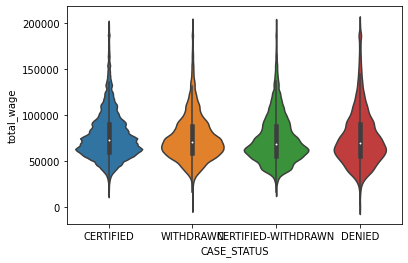

In [31]:
train_vals.to_csv('Preprocessing.csv')
sns.violinplot(x='CASE_STATUS', y='total_wage',
               data=train_vals.loc[train_vals['total_wage'] < 200000, :])


<AxesSubplot:xlabel='total_wage', ylabel='Count'>

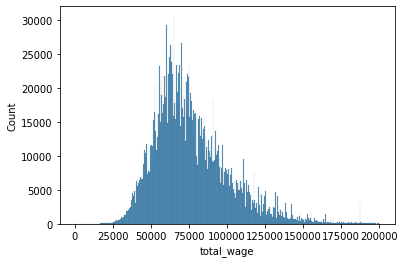

In [33]:
sns.histplot(x='total_wage',
             data=train_vals.loc[train_vals['total_wage'] < 200000, :])


<AxesSubplot:xlabel='CASE_STATUS', ylabel='PREVAILING_WAGE'>

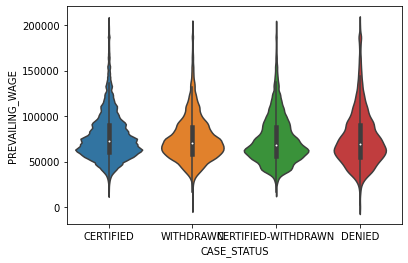

In [34]:
sns.violinplot(x='CASE_STATUS', y='PREVAILING_WAGE',
               data=train_vals.loc[train_vals['total_wage'] < 200000, :])


In [32]:
category_labels = ['NAIC_CODE', 'EMP_STATE_abb', 'VISA_CLASS',
                   'EMPLOYER_NAME', 'SOC_CODE', 'Worksite_STATE_abb']
for label in category_labels:
    print('%s:\t\t\t %d'%(label, len(np.unique(train_vals.loc[:, label]))))

NAIC_CODE:			 190
EMP_STATE_abb:			 58
VISA_CLASS:			 4
EMPLOYER_NAME:			 169255
SOC_CODE:			 100
Worksite_STATE_abb:			 58


In [33]:
training_data = train_vals

In [34]:
training_data.head()
training_data = training_data.drop(
    columns=['CASE_NUMBER', 'EMPLOYER_CITY', 'SOC_NAME', 'WORKSITE_CITY'])

In [35]:
training_data.head()

,PREVAILING_WAGE,NAIC_CODE,EMP_STATE_abb,VISA_CLASS,EMPLOYER_NAME,SOC_CODE,FULL_TIME_POSITION,Worksite_STATE_abb,total_wage,CASE_STATUS,CASE_DURATION,EMPLOYMENT_DURATION,EMPLOYER_APPLICATION_COUNT,EMPLOYER_CERTIFIED_RATE,EMPLOYER_CERTIFIED-WITHDRAWN_RATE,EMPLOYER_DENIED_RATE,EMPLOYER_WITHDRAWN_RATE
1,42860.0,611,OK,H-1B,UNIVERSITY OF OKLAHOMA,25-1,True,OK,42860.0,CERTIFIED,6,1095.0,302,0.930464,0.049669,0.006623,0.013245
2,73965.0,517,TX,H-1B,NOKIA INC.,15-1,True,CA,73965.0,WITHDRAWN,711,1094.0,25,0.040000,0.160000,0.000000,0.800000
3,65998.0,335,TX,H-1B,"OMRON OILFIELD AND MARINE, INC.",17-2,True,TX,65998.0,CERTIFIED,6,1096.0,6,0.833333,0.166667,0.000000,0.000000
4,96907.0,522,VA,H-1B,FEDERAL HOME LOAN MORTGAGE CO.,15-1,True,VA,96907.0,CERTIFIED,6,1095.0,361,0.797784,0.191136,0.011080,0.000000
6,133976.0,541,CA,H-1B,"VMWARE, INC.",15-1,True,CA,133976.0,CERTIFIED,6,1095.0,2879,0.976033,0.003473,0.015978,0.004515


In [36]:
category_labels = ['NAIC_CODE', 'EMP_STATE_abb', 'VISA_CLASS',
                   'SOC_CODE', 'Worksite_STATE_abb']
for label in category_labels:
    if label not in training_data:
        continue
    training_data = pd.concat([pd.get_dummies(
        training_data[label]), training_data], axis=1).drop(columns=[label])

In [37]:
training_data.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,FULL_TIME_POSITION,total_wage,CASE_STATUS,CASE_DURATION,EMPLOYMENT_DURATION,EMPLOYER_APPLICATION_COUNT,EMPLOYER_CERTIFIED_RATE,EMPLOYER_CERTIFIED-WITHDRAWN_RATE,EMPLOYER_DENIED_RATE,EMPLOYER_WITHDRAWN_RATE
1,0,0,0,0,0,0,0,0,0,0,...,True,42860.0,CERTIFIED,6,1095.0,302,0.930464,0.049669,0.006623,0.013245
2,0,0,0,0,1,0,0,0,0,0,...,True,73965.0,WITHDRAWN,711,1094.0,25,0.040000,0.160000,0.000000,0.800000
3,0,0,0,0,0,0,0,0,0,0,...,True,65998.0,CERTIFIED,6,1096.0,6,0.833333,0.166667,0.000000,0.000000
4,0,0,0,0,0,0,0,0,0,0,...,True,96907.0,CERTIFIED,6,1095.0,361,0.797784,0.191136,0.011080,0.000000
6,0,0,0,0,1,0,0,0,0,0,...,True,133976.0,CERTIFIED,6,1095.0,2879,0.976033,0.003473,0.015978,0.004515


In [38]:
training_data.drop(columns = ['EMPLOYER_NAME'])
def convert_boolean(x):
    return int(x)


training_data['FULL_TIME_POSITION'] = training_data['FULL_TIME_POSITION'].apply(convert_boolean)

In [43]:
def convert_label(x):
    if x == 'CERTIFIED':
        return 1
    return 0


training_data['CASE_STATUS'] = training_data['CASE_STATUS'].apply(
    convert_label)


In [39]:
training_data.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,FULL_TIME_POSITION,total_wage,CASE_STATUS,CASE_DURATION,EMPLOYMENT_DURATION,EMPLOYER_APPLICATION_COUNT,EMPLOYER_CERTIFIED_RATE,EMPLOYER_CERTIFIED-WITHDRAWN_RATE,EMPLOYER_DENIED_RATE,EMPLOYER_WITHDRAWN_RATE
1,0,0,0,0,0,0,0,0,0,0,...,1,42860.0,CERTIFIED,6,1095.0,302,0.930464,0.049669,0.006623,0.013245
2,0,0,0,0,1,0,0,0,0,0,...,1,73965.0,WITHDRAWN,711,1094.0,25,0.040000,0.160000,0.000000,0.800000
3,0,0,0,0,0,0,0,0,0,0,...,1,65998.0,CERTIFIED,6,1096.0,6,0.833333,0.166667,0.000000,0.000000
4,0,0,0,0,0,0,0,0,0,0,...,1,96907.0,CERTIFIED,6,1095.0,361,0.797784,0.191136,0.011080,0.000000
6,0,0,0,0,1,0,0,0,0,0,...,1,133976.0,CERTIFIED,6,1095.0,2879,0.976033,0.003473,0.015978,0.004515


## Normalization

In [45]:
normalized_columns = ['PREVAILING_WAGE', 'total_wage', 'CASE_DURATION', 'EMPLOYMENT_DURATION',
       'EMPLOYER_APPLICATION_COUNT', 'EMPLOYER_CERTIFIED_RATE',
       'EMPLOYER_CERTIFIED-WITHDRAWN_RATE', 'EMPLOYER_DENIED_RATE',
       'EMPLOYER_WITHDRAWN_RATE']

for c in tqdm(normalized_columns):
    training_data[c] = (training_data[c] -
                        np.mean(training_data[c]))/np.std(training_data[c])
training_data.head()



100%|██████████| 9/9 [00:00<00:00,  9.23it/s]


,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,FULL_TIME_POSITION,total_wage,CASE_STATUS,CASE_DURATION,EMPLOYMENT_DURATION,EMPLOYER_APPLICATION_COUNT,EMPLOYER_CERTIFIED_RATE,EMPLOYER_CERTIFIED-WITHDRAWN_RATE,EMPLOYER_DENIED_RATE,EMPLOYER_WITHDRAWN_RATE
1,0,0,0,0,0,0,0,0,0,0,...,1,-0.011367,CERTIFIED,-0.203980,0.293395,-0.407210,0.330229,-0.184034,-0.126292,-0.291684
2,0,0,0,0,1,0,0,0,0,0,...,1,-0.011336,WITHDRAWN,5.317541,0.287013,-0.421670,-5.684045,0.728753,-0.232216,11.945871
3,0,0,0,0,0,0,0,0,0,0,...,1,-0.011344,CERTIFIED,-0.203980,0.299776,-0.422662,-0.325798,0.783908,-0.232216,-0.497703
4,0,0,0,0,0,0,0,0,0,0,...,1,-0.011313,CERTIFIED,-0.203980,0.293395,-0.404131,-0.565902,0.986344,-0.054992,-0.497703
6,0,0,0,0,1,0,0,0,0,0,...,1,-0.011276,CERTIFIED,-0.203980,0.293395,-0.272690,0.638011,-0.566217,0.023340,-0.427467


## Split Datasets

In [46]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
train, test = train_test_split(
    training_data, stratify=training_data['CASE_STATUS'], test_size=0.3)

In [47]:
train.to_csv('train.csv')

In [48]:
test.to_csv('test.csv')

In [48]:
training_data.shape

(2435102, 422)